In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
raw_data = pd.read_csv("Iris.csv")
raw_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
raw_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
raw_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


C:\Users\subee\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


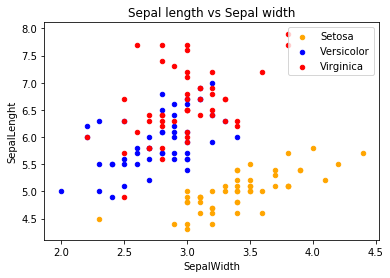

In [6]:
fig = raw_data[raw_data.Species == "Iris-setosa"].plot(kind='scatter',y='SepalLengthCm',x='SepalWidthCm',color='orange',label='Setosa')
raw_data[raw_data.Species == "Iris-versicolor"].plot(kind='scatter',y='SepalLengthCm',x='SepalWidthCm',color='blue',label='Versicolor',ax=fig)
raw_data[raw_data.Species == "Iris-virginica"].plot(kind='scatter',y='SepalLengthCm',x='SepalWidthCm',color='red',label='Virginica',ax=fig)

fig.set_ylabel('SepalLenght')
fig.set_xlabel('SepalWidth')
fig.set_title('Sepal length vs Sepal width')

fig= plt.gcf()
fig.show()

C:\Users\subee\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


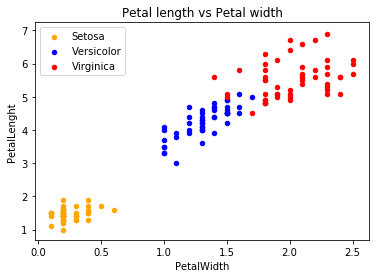

In [7]:
fig = raw_data[raw_data.Species == "Iris-setosa"].plot(kind='scatter',y='PetalLengthCm',x='PetalWidthCm',color='orange',label='Setosa')
raw_data[raw_data.Species == "Iris-versicolor"].plot(kind='scatter',y='PetalLengthCm',x='PetalWidthCm',color='blue',label='Versicolor',ax=fig)
raw_data[raw_data.Species == "Iris-virginica"].plot(kind='scatter',y='PetalLengthCm',x='PetalWidthCm',color='red',label='Virginica',ax=fig)

fig.set_ylabel('PetalLenght')
fig.set_xlabel('PetalWidth')
fig.set_title('Petal length vs Petal width')

fig= plt.gcf()
fig.show()

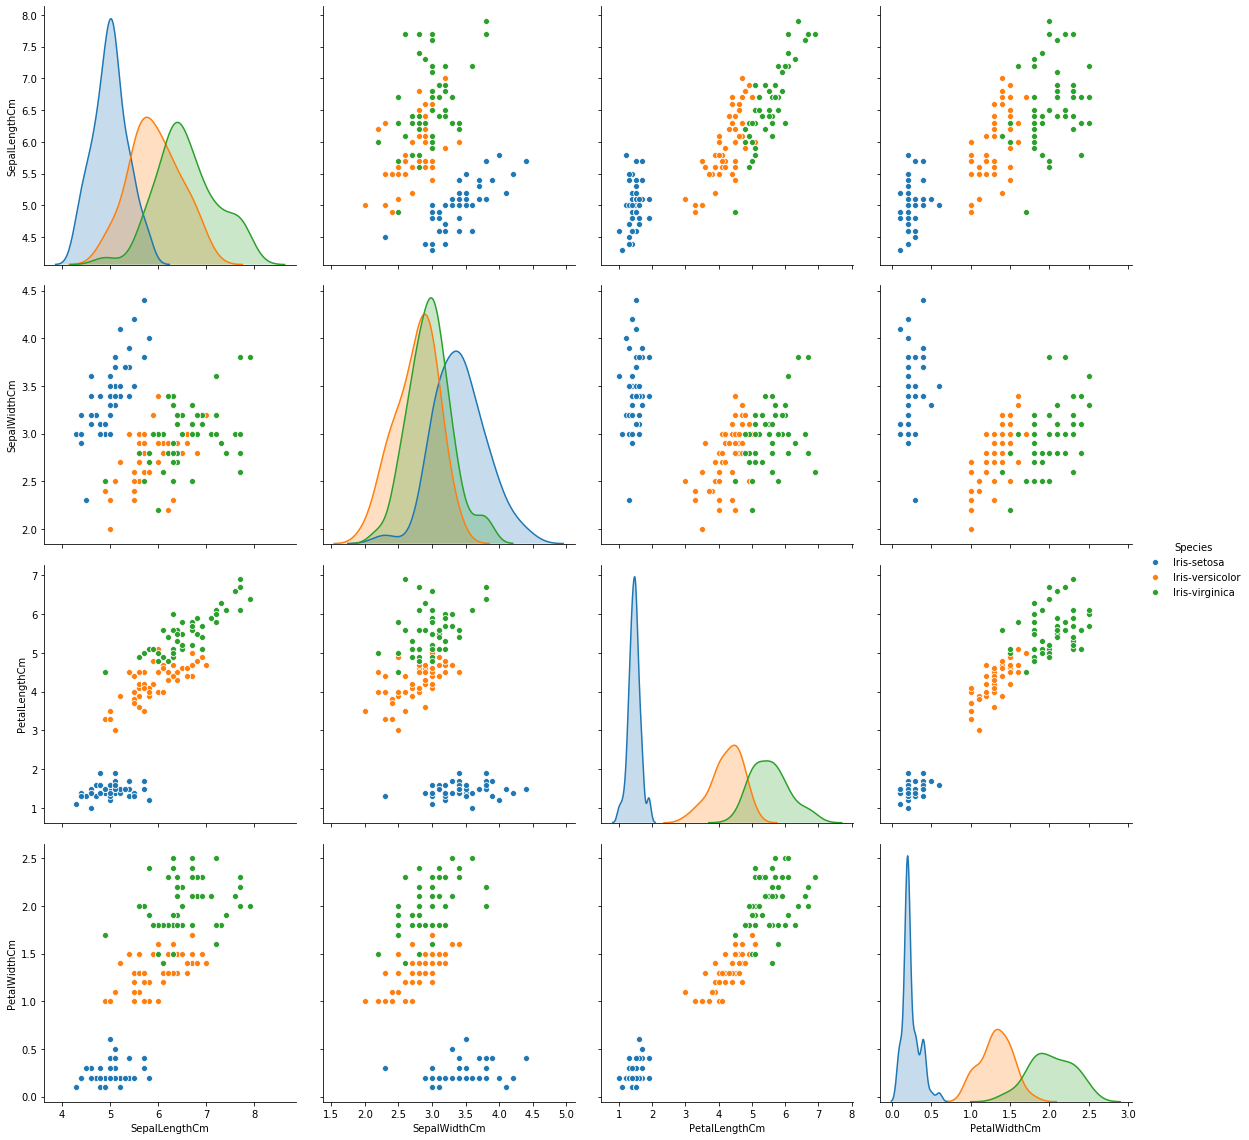

In [30]:
sns.pairplot(raw_data.drop('Id',axis=1),hue='Species',height=4)

In [9]:
raw_data.drop("Id",axis = 1 , inplace=True)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [11]:
train,test = train_test_split(raw_data,test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [12]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species

test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [13]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
134,6.1,2.6,5.6,1.4
78,6.0,2.9,4.5,1.5
53,5.5,2.3,4.0,1.3
65,6.7,3.1,4.4,1.4
62,6.0,2.2,4.0,1.0


In [14]:
test_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
106,4.9,2.5,4.5,1.7
26,5.0,3.4,1.6,0.4
132,6.4,2.8,5.6,2.2
146,6.3,2.5,5.0,1.9


# Support Vector Machine SVM

In [18]:

def svm_classifier(train_x,train_y,test_x,test_y):
    model = svm.SVC()
    model.fit(train_x,train_y)

    prediction = model.predict(test_x)
    return metrics.accuracy_score(prediction,test_y)
print(f"Using SVM we get {svm_classifier(train_x,train_y,test_x,test_y)} accuracy")

Using SVM we get 0.9777777777777777 accuracy


C:\Users\subee\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Logistic Regression 

In [19]:
def Logistic_Regression(train_x,train_y,test_x,test_y):
    model = LogisticRegression()
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)
    return metrics.accuracy_score(prediction,test_y)
print(f"Using Logistic Regression we get {Logistic_Regression(train_x,train_y,test_x,test_y)} accuracy")

Using Logistic Regression we get 0.9777777777777777 accuracy


C:\Users\subee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\subee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Decision Tree 

In [20]:
def Decision_tree(train_x,train_y,test_x,test_y):
    model = DecisionTreeClassifier()
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)
    return metrics.accuracy_score(prediction,test_y)
print(f"Using Decision Tree we get {Decision_tree(train_x,train_y,test_x,test_y)} accuracy")

Using Decision Tree we get 0.9555555555555556 accuracy


# K-Nearest Neighbors 

In [25]:
def K_Nearest_Neighbors(train_x,train_y,test_x,test_y,n_neighbors=3):
    #print(f'The value of neighbors is {n_neighbors}')
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)
    return metrics.accuracy_score(prediction,test_y)
print(f"Using K-Nearest Neighbors we get {K_Nearest_Neighbors(train_x,train_y,test_x,test_y)} accuracy")

Using K-Nearest Neighbors we get 0.9555555555555556 accuracy


 For different values of n 

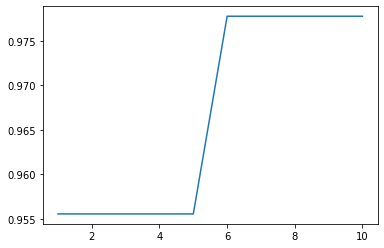

In [26]:
a_index = list(range(1,11))
a = []
for i in range(1,11):
    a.append(K_Nearest_Neighbors(train_x,train_y,test_x,test_y,i))
    
plt.plot(a_index,a)

# Determining accuracy using Petals and Sepals seperately 

In [29]:
sepals_data = raw_data[['SepalLengthCm', 'SepalWidthCm','Species']]
petals_data = raw_data[['PetalLengthCm', 'PetalWidthCm','Species']]
print(sepals_data.head(10))
print(petals_data.head(10))

   SepalLengthCm  SepalWidthCm      Species
0            5.1           3.5  Iris-setosa
1            4.9           3.0  Iris-setosa
2            4.7           3.2  Iris-setosa
3            4.6           3.1  Iris-setosa
4            5.0           3.6  Iris-setosa
5            5.4           3.9  Iris-setosa
6            4.6           3.4  Iris-setosa
7            5.0           3.4  Iris-setosa
8            4.4           2.9  Iris-setosa
9            4.9           3.1  Iris-setosa
   PetalLengthCm  PetalWidthCm      Species
0            1.4           0.2  Iris-setosa
1            1.4           0.2  Iris-setosa
2            1.3           0.2  Iris-setosa
3            1.5           0.2  Iris-setosa
4            1.4           0.2  Iris-setosa
5            1.7           0.4  Iris-setosa
6            1.4           0.3  Iris-setosa
7            1.5           0.2  Iris-setosa
8            1.4           0.2  Iris-setosa
9            1.5           0.1  Iris-setosa


In [36]:
train_x_sepals = train_x[['SepalLengthCm', 'SepalWidthCm']]
test_x_sepals = test_x[['SepalLengthCm', 'SepalWidthCm']]
train_x_petals = train_x[['PetalLengthCm', 'PetalWidthCm']]
test_x_petals = test_x[['PetalLengthCm', 'PetalWidthCm']]

## For sepals

In [37]:
print(f"Using SVM we get {svm_classifier(train_x_sepals,train_y,test_x_sepals,test_y)} accuracy")
print(f"Using Logistic Regression we get {Logistic_Regression(train_x_sepals,train_y,test_x_sepals,test_y)} accuracy")
print(f"Using Decision Tree we get {Decision_tree(train_x_sepals,train_y,test_x_sepals,test_y)} accuracy")
print(f"Using K-Nearest Neighbors we get {K_Nearest_Neighbors(train_x_sepals,train_y,test_x_sepals,test_y)} accuracy")

Using SVM we get 0.8 accuracy
Using Logistic Regression we get 0.8 accuracy
Using Decision Tree we get 0.6888888888888889 accuracy
Using K-Nearest Neighbors we get 0.7333333333333333 accuracy


C:\Users\subee\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\subee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\subee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


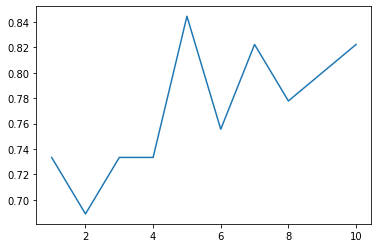

In [39]:
a_index = list(range(1,11))
a = []
for i in range(1,11):
    a.append(K_Nearest_Neighbors(train_x_sepals,train_y,test_x_sepals,test_y,i))    
plt.plot(a_index,a)

## For petals

In [42]:
print(f"Using SVM we get {svm_classifier(train_x_petals,train_y,test_x_petals,test_y)} accuracy")
print(f"Using Logistic Regression we get {Logistic_Regression(train_x_petals,train_y,test_x_petals,test_y)} accuracy")
print(f"Using Decision Tree we get {Decision_tree(train_x_petals,train_y,test_x_petals,test_y)} accuracy")
print(f"Using K-Nearest Neighbors we get {K_Nearest_Neighbors(train_x_petals,train_y,test_x_petals,test_y)} accuracy")

Using SVM we get 0.9777777777777777 accuracy
Using Logistic Regression we get 0.9333333333333333 accuracy
Using Decision Tree we get 0.9555555555555556 accuracy
Using K-Nearest Neighbors we get 0.9777777777777777 accuracy


C:\Users\subee\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\subee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\subee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


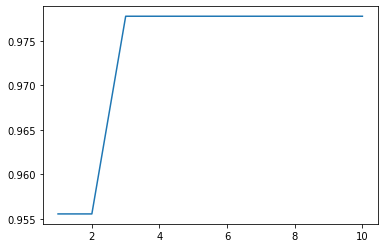

In [43]:
a_index = list(range(1,11))
a = []
for i in range(1,11):
    a.append(K_Nearest_Neighbors(train_x_petals,train_y,test_x_petals,test_y,i))    
plt.plot(a_index,a)